# Set Cover problem

See: https://en.wikipedia.org/wiki/Set_cover_problem

In [606]:
from random import random, seed
from itertools import product, accumulate
import numpy as np
from tqdm.auto import tqdm
from icecream import ic
from matplotlib import pyplot as plt

## Reproducible Initialization

If you want to get reproducible results, use `rng` (and restart the kernel); for non-reproducible ones, use `np.random`.

In [607]:
UNIVERSE_SIZE = 10000
NUM_SETS = 1000
DENSITY = 0.2
MAX_STEPS = 1000

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [608]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)


## Helper Functions

In [609]:
def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    return np.all(np.logical_or.reduce(SETS[solution]))


def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()

def fitness(solution: np.ndarray) -> tuple:
    selected_sets = SETS[solution]  
    covered_items = np.sum(np.any(selected_sets, axis=0))  
    return (covered_items, -cost(solution))

## Have Fun!

In [610]:
# A dumb solution of "all" sets
solution = np.full(NUM_SETS, True)
valid(solution), cost(solution)

(np.True_, np.float64(4280008.347378243))

In [611]:
# A random solution with random 50% of the sets
solution = rng.random(NUM_SETS) < .5
valid(solution), cost(solution)

(np.True_, np.float64(2140172.248868385))

## Hill Climbing Single_Mutation 

100%|██████████| 1000/1000 [00:05<00:00, 170.35it/s]
ic| fitness(solution): (np.int64(10000), np.float64(-753705.346391432))


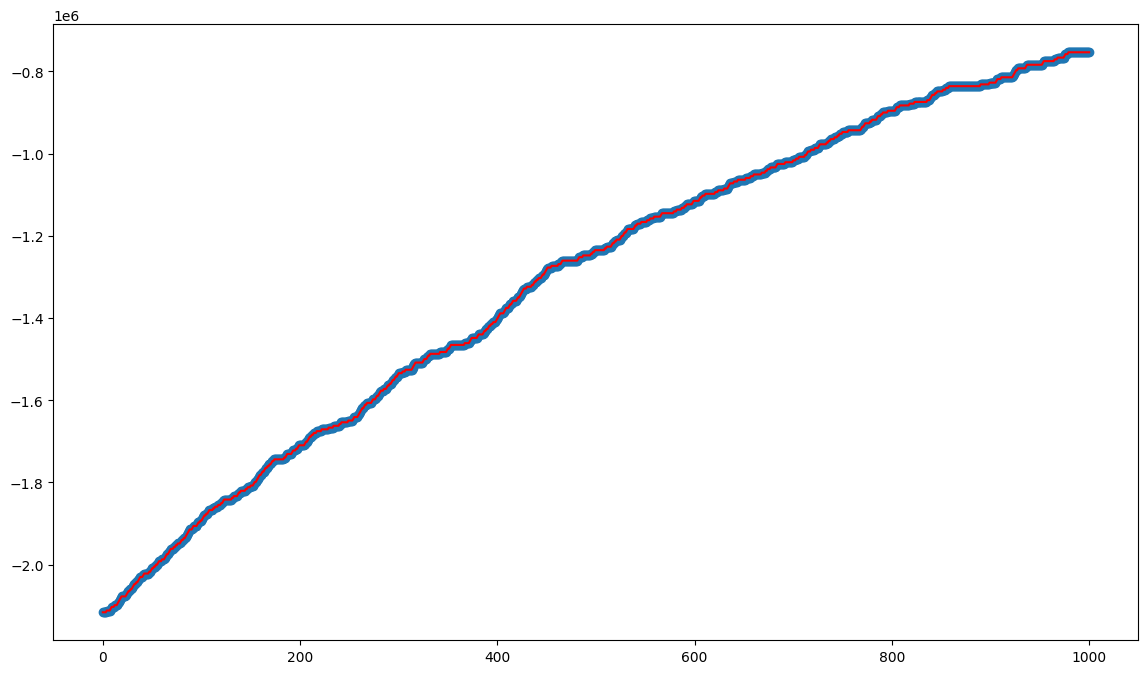

In [612]:
def single_mutation(solution: np.ndarray)-> np.ndarray:
    new_solution = solution.copy()
    i=rng.integers(0, NUM_SETS)
    new_solution[i]=not new_solution[i]
    return new_solution

solution = rng.random(NUM_SETS) < 0.5
history = [float(fitness(solution)[1])]

for n in tqdm(range(MAX_STEPS)):
    new_solution = single_mutation(solution)
    history.append(float(fitness(solution)[1]))
    if fitness(new_solution) > fitness(solution):
        solution = new_solution  
        solution_fitness=fitness(solution)

ic(fitness(solution))

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history)




# Hill Climbing Multiple_Mutation

100%|██████████| 1000/1000 [00:06<00:00, 156.82it/s]
ic| fitness(solution): (np.int64(10000), np.float64(-938317.8921057044))


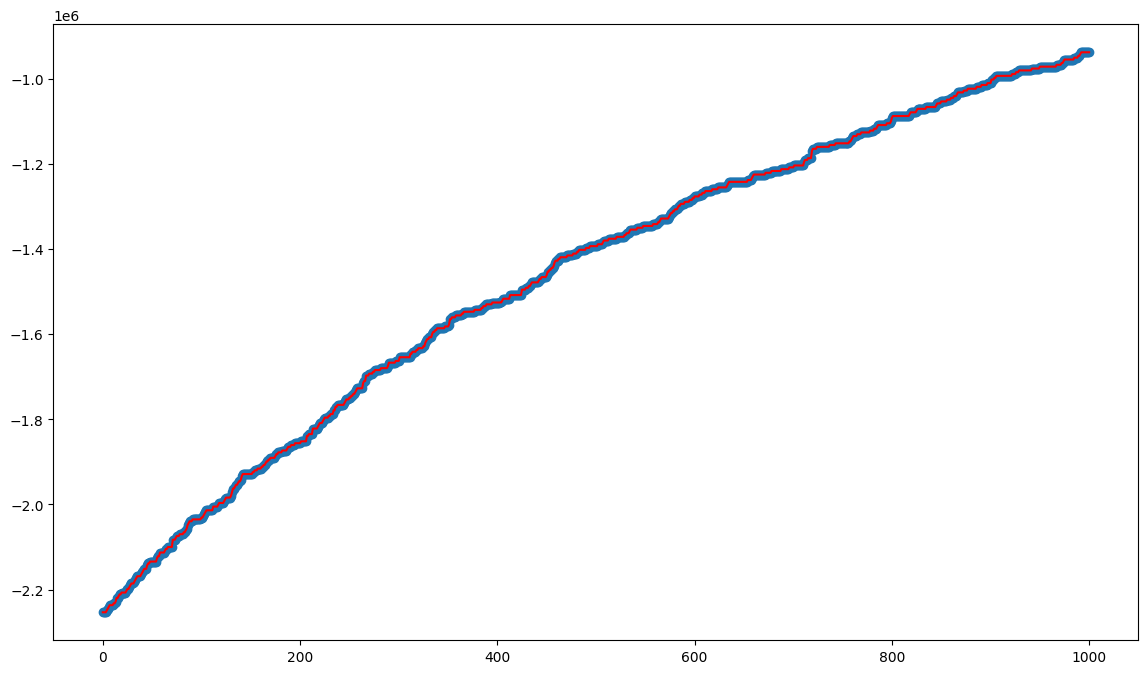

In [613]:
def multiple_mutation(solution: np.ndarray) -> np.ndarray:
    new_solution = solution.copy()
    index = None 
    while index is None or np.random.random() < 0.4:
        index = rng.integers(0, NUM_SETS)
        new_solution[index] = not new_solution[index]
    return new_solution

solution = rng.random(NUM_SETS) < 0.5
history = [float(fitness(solution)[1])]

for n in tqdm(range(MAX_STEPS)):
    new_solution = multiple_mutation(solution)
    history.append(float(fitness(solution)[1]))
    if fitness(new_solution) > fitness(solution):
        solution = new_solution  
        solution_fitness=fitness(solution)

ic(fitness(solution))

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history)